Nombre de patients : 53652
Nombre de mois : 12
Nombre de variables biologiques : 77
Forme des labels : (53652, 1)

Exemple de variables biologiques : ['creatinine' 'urea' 'c_reactive_protein' 'prothrombin_time'
 'total_proteins' 'ast' 'alt' 'alkaline_phosphatase' 'albumin'
 'total_bilirubin' 'ggt' 'unconjugated_bilirubin' 'conjugated_bilirubin'
 'ldh' 'ferritin' 'serum_iron' 'transferrin_saturation' 'transferrin'
 'uric_acid' 'prothrombin_time' 'creatine_kinase' 'parathyroid_hormone'
 'vitamin_d_25oh_total' 'fasting_glucose' 'serum_folate' 'vitamin_b12'
 'fasting_glucose' 'tsh' 'anti_hbs' 'anti_hcv' 'hba1c'
 'beta_2_microglobulin' 'glucose' 'high_sensitivity_troponin_t'
 'total_psa' 'igg' 'iga' 'igm' 'hba1c'
 'estimated_glomerular_filtration_rate' 'corrected_calcium' 'inr' 'inr_a'
 'potassium' 'sodium' 'chloride' 'total_co2' 'calcium' 'phosphorus'
 'magnesium' 'hematocrit' 'platelets' 'plasma_cells' 'rdw' 'neutrophils'
 'lymphocytes' 'mchc' 'monocytes' 'myelocytes' 'granular_lymphocyte

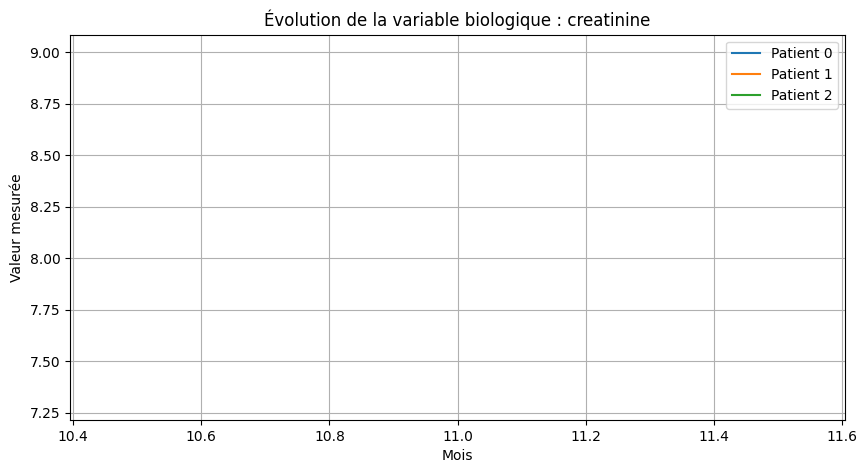

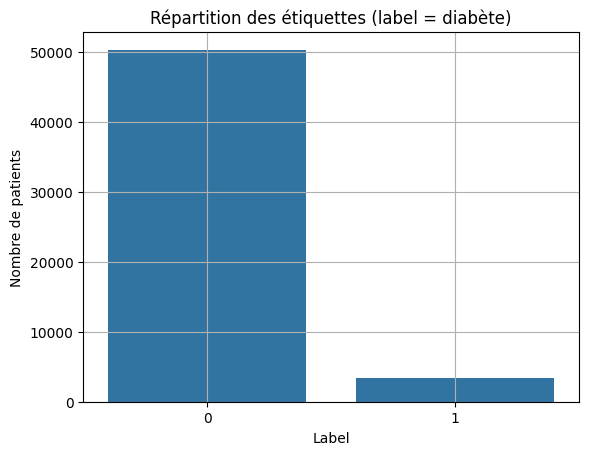

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F


# === 1. Charger les données ===
data = np.load("training_data.npz", allow_pickle=True)
X = np.array(data["data"], dtype=np.float32)  # conversion importante !
feature_labels = data["feature_labels"]

# Charger les labels
y = pd.read_csv("training_labels.csv")

# === 2. Vérifier les dimensions ===
print("Nombre de patients :", X.shape[0])
print("Nombre de mois :", X.shape[1])
print("Nombre de variables biologiques :", X.shape[2])
print("Forme des labels :", y.shape)

# === 3. Afficher les 5 premières variables ===
print("\nExemple de variables biologiques :", feature_labels[:80])

# === 4. Vérifier les valeurs manquantes ===
total_nan = np.isnan(X).sum()
print("\nValeurs manquantes totales :", total_nan)

# === 5. Visualiser un biomarqueur pour 3 patients ===
feature_index = 0  # par ex. la 1ère variable biologique
plt.figure(figsize=(10, 5))
for i in range(3):
    plt.plot(X[i, :, feature_index], label=f"Patient {i}")
plt.title(f"Évolution de la variable biologique : {feature_labels[feature_index]}")
plt.xlabel("Mois")
plt.ylabel("Valeur mesurée")
plt.legend()
plt.grid(True)
plt.show()

# === 6. Répartition des classes (diabète ou non) ===
sns.countplot(x=y["Label"])
plt.title("Répartition des étiquettes (label = diabète)")
plt.xlabel("Label")
plt.ylabel("Nombre de patients")
plt.grid(True)
plt.show()

In [2]:
# Step 1: Compute missing value ratio per feature
n_patients, n_months, n_features = X.shape
nan_counts = np.isnan(X).sum(axis=(0, 1))
nan_ratios = nan_counts / (n_patients * n_months)

# Show top 10 most missing features
for i in np.argsort(nan_ratios)[-55:][::-1]:
    print(f"{feature_labels[i]}: {nan_ratios[i]*100:.2f}% missing")


prothrombin_time: 99.98% missing
beta_2_microglobulin: 99.98% missing
inr_a: 99.98% missing
hba1c: 99.97% missing
igm: 99.97% missing
igg: 99.97% missing
glucose: 99.95% missing
iga: 99.95% missing
fasting_glucose: 99.94% missing
parathyroid_hormone: 99.92% missing
high_sensitivity_troponin_t: 99.89% missing
reticulocytes: 99.86% missing
magnesium: 99.85% missing
total_co2: 99.81% missing
ldh: 99.75% missing
creatine_kinase: 99.71% missing
anti_hbs: 99.71% missing
vitamin_b12: 99.64% missing
serum_folate: 99.64% missing
anti_hcv: 99.61% missing
transferrin_saturation: 99.55% missing
transferrin: 99.54% missing
phosphorus: 99.51% missing
corrected_calcium: 99.45% missing
total_proteins: 99.45% missing
vitamin_d_25oh_total: 99.43% missing
serum_iron: 99.39% missing
total_psa: 99.29% missing
inr: 99.23% missing
albumin: 99.10% missing
prothrombin_time: 98.83% missing
conjugated_bilirubin: 98.80% missing
unconjugated_bilirubin: 98.80% missing
total_bilirubin: 98.80% missing
calcium: 98.79%

In [3]:
# Step 1B: Count valid (non-NaN) months per patient and feature
valid_counts = np.sum(~np.isnan(X), axis=1)  # shape: (n_patients, n_features)

# Example: for patient 0, print how many months are valid per feature
patient_id = 2
for i, count in enumerate(valid_counts[patient_id]):
    print(f"{feature_labels[i]}: {count}/12 months available")


creatinine: 1/12 months available
urea: 1/12 months available
c_reactive_protein: 1/12 months available
prothrombin_time: 0/12 months available
total_proteins: 0/12 months available
ast: 1/12 months available
alt: 1/12 months available
alkaline_phosphatase: 1/12 months available
albumin: 0/12 months available
total_bilirubin: 0/12 months available
ggt: 1/12 months available
unconjugated_bilirubin: 0/12 months available
conjugated_bilirubin: 0/12 months available
ldh: 0/12 months available
ferritin: 0/12 months available
serum_iron: 0/12 months available
transferrin_saturation: 0/12 months available
transferrin: 0/12 months available
uric_acid: 0/12 months available
prothrombin_time: 0/12 months available
creatine_kinase: 0/12 months available
parathyroid_hormone: 0/12 months available
vitamin_d_25oh_total: 0/12 months available
fasting_glucose: 0/12 months available
serum_folate: 0/12 months available
vitamin_b12: 0/12 months available
fasting_glucose: 1/12 months available
tsh: 0/12 m

In [4]:
# Total number of valid measurements per patient (over all features and months)
valid_per_patient = np.sum(~np.isnan(X), axis=(1, 2))  # shape: (n_patients,)

# Print a few patients with the least amount of data
for i in np.argsort(valid_per_patient)[:200]:
    print(f"Patient {i}: {valid_per_patient[i]} valid values (out of {77 * 12})")


Patient 1686: 1 valid values (out of 924)
Patient 12286: 1 valid values (out of 924)
Patient 18860: 1 valid values (out of 924)
Patient 18747: 1 valid values (out of 924)
Patient 18696: 1 valid values (out of 924)
Patient 18670: 1 valid values (out of 924)
Patient 49074: 1 valid values (out of 924)
Patient 18634: 1 valid values (out of 924)
Patient 18833: 1 valid values (out of 924)
Patient 18837: 1 valid values (out of 924)
Patient 48930: 1 valid values (out of 924)
Patient 48848: 1 valid values (out of 924)
Patient 1701: 1 valid values (out of 924)
Patient 1702: 1 valid values (out of 924)
Patient 12317: 1 valid values (out of 924)
Patient 49018: 1 valid values (out of 924)
Patient 1518: 1 valid values (out of 924)
Patient 18481: 1 valid values (out of 924)
Patient 18487: 1 valid values (out of 924)
Patient 1522: 1 valid values (out of 924)
Patient 49335: 1 valid values (out of 924)
Patient 1545: 1 valid values (out of 924)
Patient 1557: 1 valid values (out of 924)
Patient 18881: 1 v

In [5]:
# Define threshold: less than 20 non-NaN values
threshold = 10
low_info_mask = valid_per_patient < threshold

# Count how many patients are below threshold
num_low_info = np.sum(low_info_mask)
print(f"Patients with < {threshold} valid values: {num_low_info} / {X.shape[0]}")

# Optional: remove them from X and y
#X_filtered = X[~low_info_mask]
#y_filtered = y[~low_info_mask.reset_index(drop=True)]


Patients with < 10 valid values: 19482 / 53652


In [6]:
# For each patient and feature, check if there is at least one valid month
has_data = np.any(~np.isnan(X), axis=1)  # shape: (n_patients, n_features)

# Count how many features have ≥1 valid month per patient
features_with_data = np.sum(has_data, axis=1)  # shape: (n_patients,)

# Example: check for first few patients
for i in range(5):
    print(f"Patient {i}: {features_with_data[i]} / 77 features with data")


Patient 0: 2 / 77 features with data
Patient 1: 30 / 77 features with data
Patient 2: 19 / 77 features with data
Patient 3: 35 / 77 features with data
Patient 4: 1 / 77 features with data


In [7]:
# Choose a specific patient (e.g., Patient 1)
patient_id = 2

# Count valid months per feature for this patient
valid_months_per_feature = np.sum(~np.isnan(X[patient_id]), axis=0)  # shape: (77,)

# Show only features where there's at least 1 valid value
for i, count in enumerate(valid_months_per_feature):
    if count > 0:
        print(f"{feature_labels[i]}: {count}/12 valid months")


creatinine: 1/12 valid months
urea: 1/12 valid months
c_reactive_protein: 1/12 valid months
ast: 1/12 valid months
alt: 1/12 valid months
alkaline_phosphatase: 1/12 valid months
ggt: 1/12 valid months
fasting_glucose: 1/12 valid months
estimated_glomerular_filtration_rate: 1/12 valid months
potassium: 1/12 valid months
sodium: 1/12 valid months
chloride: 1/12 valid months
total_cholesterol: 1/12 valid months
non_hdl_cholesterol: 1/12 valid months
hdl_cholesterol: 1/12 valid months
triglycerides: 1/12 valid months
measured_ldl_cholesterol: 1/12 valid months
patient_age: 2/12 valid months
sex: 2/12 valid months


In [8]:
# Choose a specific patient (e.g., Patient 1)
patient_id = 2

# Count valid months per feature for this patient
valid_months_per_feature = np.sum(~np.isnan(X[patient_id]), axis=0)  # shape: (77,)

# Print for all 77 features (even if 0 months)
for i, count in enumerate(valid_months_per_feature):
    print(f"{feature_labels[i]}: {count}/12 valid months")


creatinine: 1/12 valid months
urea: 1/12 valid months
c_reactive_protein: 1/12 valid months
prothrombin_time: 0/12 valid months
total_proteins: 0/12 valid months
ast: 1/12 valid months
alt: 1/12 valid months
alkaline_phosphatase: 1/12 valid months
albumin: 0/12 valid months
total_bilirubin: 0/12 valid months
ggt: 1/12 valid months
unconjugated_bilirubin: 0/12 valid months
conjugated_bilirubin: 0/12 valid months
ldh: 0/12 valid months
ferritin: 0/12 valid months
serum_iron: 0/12 valid months
transferrin_saturation: 0/12 valid months
transferrin: 0/12 valid months
uric_acid: 0/12 valid months
prothrombin_time: 0/12 valid months
creatine_kinase: 0/12 valid months
parathyroid_hormone: 0/12 valid months
vitamin_d_25oh_total: 0/12 valid months
fasting_glucose: 0/12 valid months
serum_folate: 0/12 valid months
vitamin_b12: 0/12 valid months
fasting_glucose: 1/12 valid months
tsh: 0/12 valid months
anti_hbs: 0/12 valid months
anti_hcv: 0/12 valid months
hba1c: 0/12 valid months
beta_2_microglo

# ***Mask + Timespent***

In [ ]:
X_values = X.copy()  # shape: (n_patients, 12, 77)

X_masks = ~np.isnan(X_values)  # True if value is present
X_masks = X_masks.astype(np.float32)  # convert to 0.0 / 1.0


In [11]:
def compute_time_deltas(mask_array):
    """
    Computes time since last observation for each timestep.
    mask_array: shape (n_patients, 12, 77)
    returns: deltas of same shape
    """
    n_patients, n_steps, n_features = mask_array.shape
    deltas = np.zeros_like(mask_array, dtype=np.float32)

    # Loop over time
    for t in range(1, n_steps):
        deltas[:, t] = (1 - mask_array[:, t]) * (deltas[:, t - 1] + 1)
    return deltas

X_deltas = compute_time_deltas(X_masks)


In [12]:
import torch
from torch.utils.data import Dataset

class DiabetesDataset(Dataset):
    def __init__(self, X_values, X_masks, X_deltas, y_labels):
        """
        X_values  : (n_samples, seq_len, n_features), float32, with NaNs
        X_masks   : (n_samples, seq_len, n_features), float32
        X_deltas  : (n_samples, seq_len, n_features), float32
        y_labels  : (n_samples, 1) or (n_samples,), binary labels
        """
        self.X_values = torch.tensor(X_values, dtype=torch.float32)
        self.X_masks = torch.tensor(X_masks, dtype=torch.float32)
        self.X_deltas = torch.tensor(X_deltas, dtype=torch.float32)
        self.y = torch.tensor(y_labels.values if hasattr(y_labels, "values") else y_labels, dtype=torch.float32)

    def __len__(self):
        return self.X_values.shape[0]

    def __getitem__(self, idx):
        return {
            "values": self.X_values[idx],   # shape: (12, 77)
            "masks": self.X_masks[idx],     # shape: (12, 77)
            "deltas": self.X_deltas[idx],   # shape: (12, 77)
            "label": self.y[idx]            # shape: ()
        }


In [13]:
from torch.utils.data import DataLoader

# Assume you have:
# X_values, X_masks, X_deltas, y = your preprocessed inputs

dataset = DiabetesDataset(X_values, X_masks, X_deltas, y)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Check one batch
batch = next(iter(dataloader))
print(batch['values'].shape)  # (32, 12, 77)
print(batch['masks'].shape)   # (32, 12, 77)
print(batch['deltas'].shape)  # (32, 12, 77)
print(batch['label'].shape)   # (32,)


torch.Size([32, 12, 77])
torch.Size([32, 12, 77])
torch.Size([32, 12, 77])
torch.Size([32, 1])


In [14]:
from sklearn.model_selection import train_test_split

# Split into 80% train / 20% validation
indices = list(range(len(X_values)))
train_idx, val_idx = train_test_split(indices, test_size=0.2, random_state=42, stratify=y)

# Create subsets
train_dataset = torch.utils.data.Subset(DiabetesDataset(X_values, X_masks, X_deltas, y), train_idx)
val_dataset = torch.utils.data.Subset(DiabetesDataset(X_values, X_masks, X_deltas, y), val_idx)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [15]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
import numpy as np
import torch

def evaluate(model, val_loader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in val_loader:
            x = torch.nan_to_num(batch["values"].to(device), nan=0.0)
            mask = batch["masks"].to(device)
            delta = batch["deltas"].to(device)
            y = batch["label"].to(device).squeeze()

            logits = model(x, mask, delta)  # raw logits
            probs = torch.sigmoid(logits)   # convert to probabilities

            all_preds.extend(probs.cpu().numpy().flatten())
            all_labels.extend(y.cpu().numpy().flatten())

    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)

    # 🔍 Threshold search to maximize F1
    thresholds = np.linspace(0.0, 1.0, 101)
    best_thresh = 0.5
    best_f1 = 0.0

    for t in thresholds:
        pred_bin = (all_preds >= t).astype(int)
        f1 = f1_score(all_labels, pred_bin)
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = t

    # Final metrics using the best threshold
    final_preds = (all_preds >= best_thresh).astype(int)

    print("📊 Validation metrics:")
    print(f"  Best Threshold : {best_thresh:.2f}")
    print(f"  Accuracy       : {accuracy_score(all_labels, final_preds):.4f}")
    print(f"  F1 Score       : {f1_score(all_labels, final_preds):.4f}")
    print(f"  AUC            : {roc_auc_score(all_labels, all_preds):.4f}")
    print(f"  Precision      : {precision_score(all_labels, final_preds):.4f}")
    print(f"  Recall         : {recall_score(all_labels, final_preds):.4f}")


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class GRUD(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=1):
        super(GRUD, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        # Trainable decay parameters (gamma)
        self.gamma_x = nn.Parameter(torch.ones(input_size))
        self.gamma_h = nn.Parameter(torch.ones(hidden_size))

        # Linear layers to compute decay
        self.z_layer = nn.Linear(input_size * 2, hidden_size)
        self.r_layer = nn.Linear(input_size * 2, hidden_size)
        self.h_layer = nn.Linear(input_size + hidden_size, hidden_size)

        # Output layer (binary classification)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, mask, delta):
        """
        x     : (B, T, F) - input with NaNs replaced by 0
        mask  : (B, T, F) - 1 if value present, 0 if missing
        delta : (B, T, F) - time since last observation
        """

        B, T, num_features = x.shape
        h = torch.zeros(B, self.hidden_size, device=x.device)

        x_last = torch.zeros_like(x[:, 0])  # shape: (B, F)

        for t in range(T):
            x_t = x[:, t]           # shape: (B, F)
            m_t = mask[:, t]        # shape: (B, F)
            d_t = delta[:, t]       # shape: (B, F)

            # decay of input
            
            
            gamma_x_t = torch.exp(-F.relu(self.gamma_x).unsqueeze(0) * d_t)  # shape (B, 77)


            x_hat = m_t * x_t + (1 - m_t) * (gamma_x_t * x_last)

            # decay of hidden state
            gamma_h_t = torch.exp(-F.relu(self.gamma_h).unsqueeze(0))  # ✅ CORRECT
            h = gamma_h_t * h

            combined = torch.cat([x_hat, m_t], dim=-1)
            z = torch.sigmoid(self.z_layer(combined))
            r = torch.sigmoid(self.r_layer(combined))
            h_tilde = torch.tanh(self.h_layer(torch.cat([x_hat, r * h], dim=-1)))
            h = (1 - z) * h + z * h_tilde

            x_last = x_hat

        out = self.fc(h)
        return out.view(-1, 1)  # return raw logits



In [17]:
# Collect all labels from the training set
all_labels = []

for batch in train_loader:
    y = batch["label"]
    all_labels.append(y)

# Concatenate into one tensor
labels_tensor = torch.cat(all_labels).to(torch.float32)

# Compute class counts
num_positive = (labels_tensor == 1).sum()
num_negative = (labels_tensor == 0).sum()

# Compute pos_weight as required by BCEWithLogitsLoss
pos_weight_value = num_negative / num_positive
pos_weight = torch.tensor([pos_weight_value])

print(f"Using pos_weight: {pos_weight.item():.4f}")


Using pos_weight: 14.8147


In [19]:
import torch.nn.functional as F

device = torch.device("cpu")
model = GRUD(input_size=77, hidden_size=64).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
#criterion = nn.BCELoss()
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)




best_f1 = 0
patience = 5
patience_counter = 0

for epoch in range(30):
    model.train()
    total_loss = 0

    for batch in train_loader:
        x = batch["values"].to(device)
        mask = batch["masks"].to(device)
        delta = batch["deltas"].to(device)
        y = batch["label"].to(device).squeeze()
        x_clean = torch.nan_to_num(x, nan=0.0)

        optimizer.zero_grad()
        y_hat = model(x_clean, mask, delta)
        loss = criterion(y_hat.squeeze(1), y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"\n🧠 Epoch {epoch+1} — Loss: {total_loss:.4f}")
    
    # 🔍 Evaluate on validation and get F1 from it
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in val_loader:
            x = torch.nan_to_num(batch["values"].to(device), nan=0.0)
            mask = batch["masks"].to(device)
            delta = batch["deltas"].to(device)
            y = batch["label"].to(device).squeeze()

            logits = model(x, mask, delta)
            probs = torch.sigmoid(logits)

            all_preds.extend(probs.cpu().numpy().flatten())
            all_labels.extend(y.cpu().numpy().flatten())

    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)

    # Optimize threshold
    thresholds = np.linspace(0, 1, 101)
    best_thresh = 0.5
    best_epoch_f1 = 0

    for t in thresholds:
        pred_bin = (all_preds >= t).astype(int)
        f1 = f1_score(all_labels, pred_bin)
        if f1 > best_epoch_f1:
            best_epoch_f1 = f1
            best_thresh = t

    print("📊 Validation metrics:")
    print(f"  Best Threshold : {best_thresh:.2f}")
    print(f"  F1 Score       : {best_epoch_f1:.4f}")

    # 💾 Early stopping check
    if best_epoch_f1 > best_f1:
        best_f1 = best_epoch_f1
        best_threshold = best_thresh   # <- Save best threshold
        patience_counter = 0
        # torch.save(model.state_dict(), "best_model.pt")  # optional: save best model
    else:
        patience_counter += 1
        print(f"  ⚠️ No improvement. Patience: {patience_counter}/{patience}")
        if patience_counter >= patience:
            print("⛔ Early stopping triggered.")
            break



🧠 Epoch 1 — Loss: 1363.9907
📊 Validation metrics:
  Best Threshold : 0.71
  F1 Score       : 0.3855

🧠 Epoch 2 — Loss: 1207.4349
📊 Validation metrics:
  Best Threshold : 0.79
  F1 Score       : 0.3935

🧠 Epoch 3 — Loss: 1160.0475
📊 Validation metrics:
  Best Threshold : 0.82
  F1 Score       : 0.3980

🧠 Epoch 4 — Loss: 1105.7577
📊 Validation metrics:
  Best Threshold : 0.73
  F1 Score       : 0.4111

🧠 Epoch 5 — Loss: 1077.3147
📊 Validation metrics:
  Best Threshold : 0.78
  F1 Score       : 0.4127

🧠 Epoch 6 — Loss: 1052.3089
📊 Validation metrics:
  Best Threshold : 0.79
  F1 Score       : 0.3944
  ⚠️ No improvement. Patience: 1/5

🧠 Epoch 7 — Loss: 1035.3278
📊 Validation metrics:
  Best Threshold : 0.81
  F1 Score       : 0.3809
  ⚠️ No improvement. Patience: 2/5

🧠 Epoch 8 — Loss: 1035.0850
📊 Validation metrics:
  Best Threshold : 0.76
  F1 Score       : 0.4205

🧠 Epoch 9 — Loss: 1032.3427
📊 Validation metrics:
  Best Threshold : 0.78
  F1 Score       : 0.4168
  ⚠️ No improvement. 

# ***testing the BCE***

In [30]:
data = np.load("evaluation_data.npz", allow_pickle=True)
X_values = np.array(data["data"], dtype=np.float32)


X_masks = ~np.isnan(X_values)
X_masks = X_masks.astype(np.float32)


X_deltas = compute_time_deltas(X_masks)


In [31]:
class DiabetesDataset(Dataset):
    def __init__(self, X_values, X_masks, X_deltas, y_labels=None):
        self.X_values = torch.tensor(X_values, dtype=torch.float32)
        self.X_masks = torch.tensor(X_masks, dtype=torch.float32)
        self.X_deltas = torch.tensor(X_deltas, dtype=torch.float32)

        if y_labels is not None:
            self.y = torch.tensor(
                y_labels.values if hasattr(y_labels, "values") else y_labels,
                dtype=torch.float32,
            )
        else:
            self.y = None

    def __len__(self):
        return self.X_values.shape[0]

    def __getitem__(self, idx):
        item = {
            "values": self.X_values[idx],
            "masks": self.X_masks[idx],
            "deltas": self.X_deltas[idx],
        }
        if self.y is not None:
            item["label"] = self.y[idx]
        return item



inference_dataset = DiabetesDataset(X_values, X_masks, X_deltas)
inference_loader = DataLoader(inference_dataset, batch_size=32, shuffle=False)




In [32]:
def predict_classes(model, data_loader, device, threshold=0.80):
    model.eval()
    predictions = []

    with torch.no_grad():
        for batch in data_loader:
            x = torch.nan_to_num(batch["values"].to(device), nan=0.0)
            mask = batch["masks"].to(device)
            delta = batch["deltas"].to(device)

            logits = model(x, mask, delta)
            probs = torch.sigmoid(logits).cpu().numpy().flatten()
            preds = (probs >= threshold).astype(int)
            predictions.extend(preds)

    return predictions


In [33]:
# Run prediction
predictions = predict_classes(model, inference_loader, device, threshold=0.80)

# Format and export
import pandas as pd

submission_df = pd.DataFrame({
    "Id": range(len(predictions)),
    "Label": predictions
})

submission_df.to_csv("submission.csv", index=False)

print("✅ Binary label submission saved as submission.csv")


✅ Binary label submission saved as submission.csv


# ***BERTS***

In [70]:
import numpy as np
import pandas as pd

# Step 1: Load .npz file
with np.load("training_data.npz", allow_pickle=True) as f:
    X = f["data"]  # shape: (n_samples, 12, 77)
    feature_names = f["feature_labels"]  # array of 77 feature names

# Step 2: Load CSV labels

y = pd.read_csv("training_labels.csv")

In [71]:
X = np.array(data["data"], dtype=np.float32) 

In [72]:
import numpy as np

# Assuming you already loaded this:
# X shape = (n_samples, 12, 77)
# y = labels (DataFrame or Series)


# Step 1a: Create mask (1 where not NaN, 0 where NaN)
X_mask = ~np.isnan(X)
X_mask = X_mask.astype(np.float32)  # convert boolean to 0/1

# Step 1b: Compute deltas
def compute_deltas(mask):
    n_samples, n_steps, n_features = mask.shape
    deltas = np.zeros_like(mask, dtype=np.float32)
    for i in range(n_samples):
        for f in range(n_features):
            last_observed = 0
            for t in range(n_steps):
                if mask[i, t, f]:
                    last_observed = 0
                else:
                    last_observed += 1
                deltas[i, t, f] = last_observed
    return deltas

X_delta = compute_deltas(X_mask)

# Step 1c: Build BRITS-compatible input dict per sample
brits_data = []
for i in range(len(X)):
    sample = {
        'values': X[i],         # shape: (12, 77)
        'masks': X_mask[i],     # same shape
        'deltas': X_delta[i],   # same shape
        'evals': X[i].copy(),   # keep a copy for evaluation
        'eval_masks': X_mask[i],
        'label': float(y.iloc[i].values[0])  # assumes one column
    }
    brits_data.append(sample)


In [73]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LightBRITS(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(LightBRITS, self).__init__()
        self.hidden_size = hidden_size
        self.input_size = input_size

        self.rnn_forward = nn.GRU(input_size * 2, hidden_size, batch_first=True)
        self.rnn_backward = nn.GRU(input_size * 2, hidden_size, batch_first=True)

        self.fc = nn.Linear(hidden_size * 2, 1)

    def forward(self, x, m, d):
        # Imputation (basic): replace missing with last observed
        x_imputed = x.clone()

        # Step 1: Fill first timestep
        x_imputed[:, 0] = torch.where(m[:, 0].bool(), x[:, 0], torch.zeros_like(x[:, 0]))

        # Step 2: Iteratively fill the rest
        for t in range(1, x.shape[1]):
            prev = x_imputed[:, t - 1]
            current = x[:, t]
            mask_t = m[:, t]
            x_imputed[:, t] = torch.where(mask_t.bool(), current, prev)


        x_combined = torch.cat([x_imputed, m], dim=-1)  # shape: (B, T, 2F)

        h_forward, _ = self.rnn_forward(x_combined)
        h_backward, _ = self.rnn_backward(torch.flip(x_combined, dims=[1]))
        h_backward = torch.flip(h_backward, dims=[1])

        h_concat = torch.cat([h_forward[:, -1], h_backward[:, 0]], dim=-1)
        out = self.fc(h_concat)
        return out.view(-1, 1)  # raw logits


In [74]:
from sklearn.utils.class_weight import compute_class_weight

# Get class weights
from sklearn.utils.class_weight import compute_class_weight

# Make sure y is a 1D array of integers
y_int = y.values.squeeze().astype(int)

# Get class weights (e.g., for BCEWithLogitsLoss pos_weight)
class_weights = compute_class_weight('balanced', classes=np.unique(y_int), y=y_int)

# Compute pos_weight = weight for class 1 / weight for class 0
pos_weight = torch.tensor(class_weights[1] / class_weights[0], dtype=torch.float32).to(device)

# Define the loss with pos_weight
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)


from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import numpy as np

def evaluate(model, dataloader):
    model.eval()
    y_true, y_pred, y_prob = [], [], []
    with torch.no_grad():
        for batch in dataloader:
            x = batch["values"].to(device)
            m = batch["masks"].to(device)
            d = batch["deltas"].to(device)
            y = batch["label"].to(device)

            logits = model(x, m, d)
            probs = torch.sigmoid(logits)
            preds = (probs > 0.5).float()

            y_true.extend(y.cpu().numpy().flatten())
            y_pred.extend(preds.cpu().numpy().flatten())
            y_prob.extend(probs.cpu().numpy().flatten())

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_prob = np.array(y_prob)

    # Filter out any NaNs
    valid_mask = ~np.isnan(y_true) & ~np.isnan(y_pred) & ~np.isnan(y_prob)
    y_true = y_true[valid_mask]
    y_pred = y_pred[valid_mask]
    y_prob = y_prob[valid_mask]

    # If no valid data left, return dummy metrics
    if len(y_true) == 0:
        return {"acc": 0.0, "f1": 0.0, "auc": 0.0}

    return {
        "acc": accuracy_score(y_true, y_pred),
        "f1": f1_score(y_true, y_pred),
        "auc": roc_auc_score(y_true, y_prob)
    }


# Train
EPOCHS = 20
for epoch in range(1, EPOCHS + 1):
    model.train()
    total_loss = 0
    for batch in train_loader:
        x = batch["values"].to(device)
        m = batch["masks"].to(device)
        d = batch["deltas"].to(device)
        y = batch["label"].to(device).view(-1, 1)

        optimizer.zero_grad()
        logits = model(x, m, d)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    metrics = evaluate(model, val_loader)
    print(f"\nEpoch {epoch} | Loss: {total_loss:.4f} | F1: {metrics['f1']:.4f} | AUC: {metrics['auc']:.4f} | Acc: {metrics['acc']:.4f}")



Epoch 1 | Loss: nan | F1: 0.0000 | AUC: 0.0000 | Acc: 0.0000

Epoch 2 | Loss: nan | F1: 0.0000 | AUC: 0.0000 | Acc: 0.0000

Epoch 3 | Loss: nan | F1: 0.0000 | AUC: 0.0000 | Acc: 0.0000


KeyboardInterrupt: 